P: 26.21% of values are censored.
N: 0.07% of values are censored.
K: 0.21% of values are censored.
Skewness of Original OC: 3.98
Skewness of Log-Transformed OC: 0.95


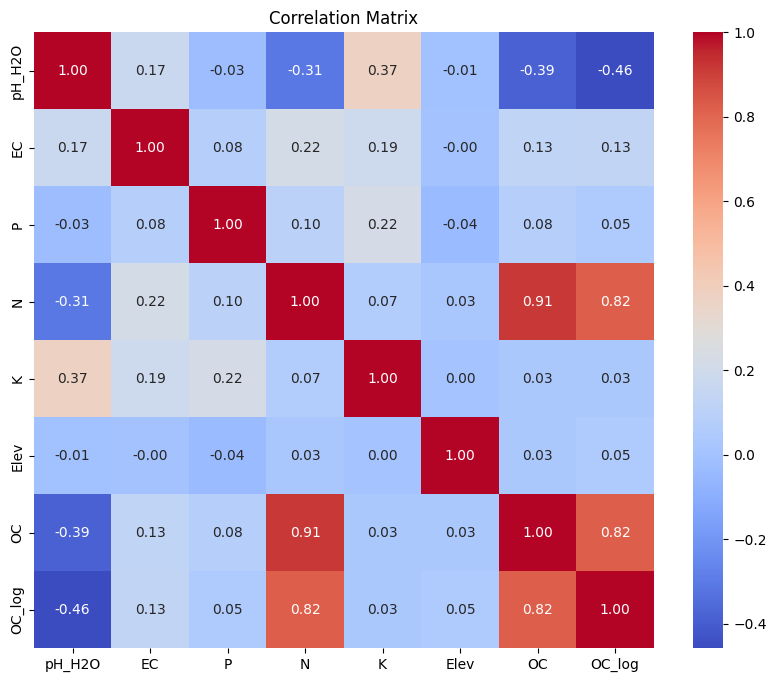

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the raw dataset
df = pd.read_csv('LUCAS-SOIL-2018.csv')

# Keep only the relevant columns
cols = ['pH_H2O', 'EC', 'P', 'N', 'K', 'Elev', 'OC']
df = df[cols].copy()

for col in ['P', 'N', 'K']:
    pct_censored = (df[col].astype(str).str.contains('< LOD')).mean() * 100
    print(f"{col}: {pct_censored:.2f}% of values are censored.")

# Replace "< LOD" values for P, N, K with half the LOD
lod_dict = {'P': 10, 'N': 0.2, 'K': 10}
for col, lod in lod_dict.items():
    df[col] = df[col].replace(r'\s*<\s*LOD\s*', lod/2, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure the other columns are numeric
for col in ['pH_H2O','EC','Elev','OC']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Log-transform the OC column to handle skewed distribution
df['OC_log'] = np.log1p(df['OC'])

from scipy.stats import skew

original_skew = skew(df['OC'])
log_skew = skew(df['OC_log'])

print(f"Skewness of Original OC: {original_skew:.2f}")
print(f"Skewness of Log-Transformed OC: {log_skew:.2f}")


# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Descriptive statistics for OC in rows with censored P values:
count    4955.000000
mean       30.856337
std        33.829712
min         2.200000
25%        12.600000
50%        21.900000
75%        37.900000
max       527.200000
Name: OC, dtype: float64


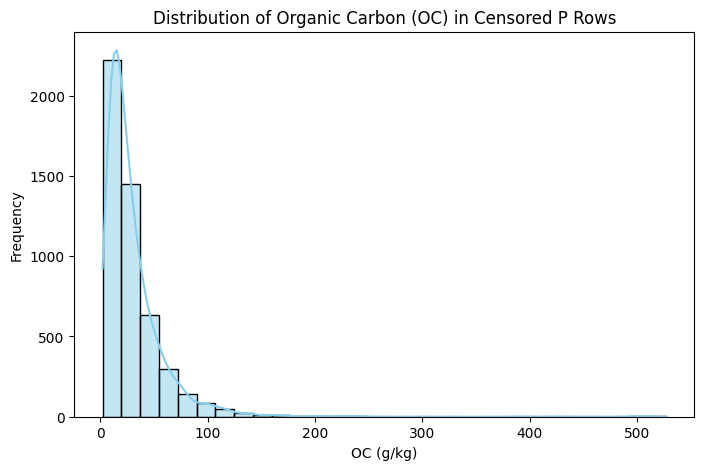

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with P as string to detect "< LOD"
df_raw = pd.read_csv('LUCAS-SOIL-2018.csv', dtype={'P': str})

# Create a boolean mask for rows where P contains "< LOD"
censored_mask = df_raw['P'].str.contains(r'<\s*LOD', regex=True, na=False)

# Extract rows with censored phosphorus values
df_censored = df_raw[censored_mask].copy()

# Convert OC to numeric (assuming OC column is numeric or convertible)
df_censored['OC'] = pd.to_numeric(df_censored['OC'], errors='coerce')

# Drop rows where OC conversion failed
df_censored.dropna(subset=['OC'], inplace=True)

# Print descriptive statistics for OC in censored rows
print("Descriptive statistics for OC in rows with censored P values:")
print(df_censored['OC'].describe())

# Plot the distribution of OC for these rows
plt.figure(figsize=(8, 5))
sns.histplot(df_censored['OC'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Organic Carbon (OC) in Censored P Rows")
plt.xlabel("OC (g/kg)")
plt.ylabel("Frequency")
plt.show()


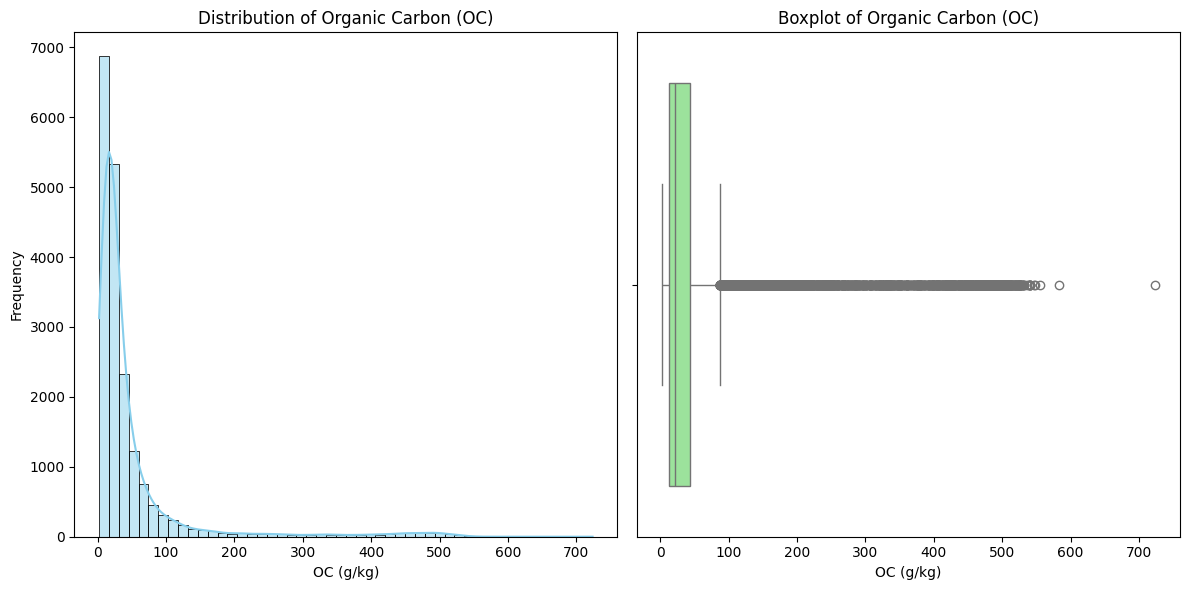

Skewness of OC: 3.98


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load the dataset (update the file path as needed)
df = pd.read_csv('LUCAS-SOIL-2018.csv')

# Keep only the relevant columns
cols = ['pH_H2O', 'EC', 'P', 'N', 'K', 'Elev', 'OC']
df = df[cols].copy()

# Replace '< LOD' with half of the limit for P, N, and K
lod_dict = {'P': 10, 'N': 0.2, 'K': 10}
for col, lod in lod_dict.items():
    df[col] = df[col].replace(r'\s*<\s*LOD\s*', lod/2, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure the other columns are numeric
for col in ['pH_H2O', 'EC', 'Elev', 'OC']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the selected columns
df = df.dropna()

# Visualize the distribution of OC

plt.figure(figsize=(12, 6))

# Histogram with Kernel Density Estimate (KDE)
plt.subplot(1, 2, 1)
sns.histplot(df['OC'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Organic Carbon (OC)")
plt.xlabel("OC (g/kg)")
plt.ylabel("Frequency")

# Boxplot for outlier detection
plt.subplot(1, 2, 2)
sns.boxplot(x=df['OC'], color='lightgreen')
plt.title("Boxplot of Organic Carbon (OC)")
plt.xlabel("OC (g/kg)")

plt.tight_layout()
plt.show()

# Calculate and print the skewness of OC
oc_skewness = skew(df['OC'])
print(f"Skewness of OC: {oc_skewness:.2f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Load your processed data
df = pd.read_csv('LUCAS-SOIL-2018_processed.csv')

# Ensure columns exist (assuming columns are: pH_H2O, EC, P, N, K, Elev, OC, and OC_log)
columns = ['pH_H2O', 'EC', 'P', 'N', 'K', 'Elev', 'OC', 'OC_log']
cols_to_transform = ['EC', 'P', 'N', 'K', 'Elev']

df = df[columns].copy()

pt = PowerTransformer(method='yeo-johnson')
df['Elev_Transformed'] = pt.fit_transform(df['Elev'])


# 1. Descriptive Statistics (count, mean, std, min, 25%, 50%, 75%, max)
desc_stats = df.describe()
print("Descriptive Statistics:")
print(desc_stats)

# 2. Skewness of each variable
skewness = df.skew()
print("\nSkewness:")
print(skewness)

# 3. Kurtosis of each variable (measures the "tailedness" of the distribution)
kurtosis = df.kurtosis()
print("\nKurtosis:")
print(kurtosis)

# 4. Correlation Matrix (to understand how features and targets are related)
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# # (Optional) Save these statistics to CSV files for documentation:
# desc_stats.to_csv('descriptive_statistics.csv')
# skewness.to_csv('skewness.csv', header=["Skewness"])
# kurtosis.to_csv('kurtosis.csv', header=["Kurtosis"])
# corr_matrix.to_csv('correlation_matrix.csv')

# print("\nStatistics saved to CSV files.")

# For further visualization, you can plot the correlation matrix using a heatmap:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[246. 232. 283. ...  50. 122. 143.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.